----------------------------------
       1.Data Selection           
----------------------------------

    fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0             7.4             0.700         0.00             1.9      0.076   
1             7.8             0.880         0.00             2.6      0.098   
2             7.8             0.760         0.04             2.3      0.092   
3            11.2             0.280         0.56             1.9      0.075   
4             7.4             0.700         0.00             1.9      0.076   
5             7.4             0.660         0.00             1.8      0.075   
6             7.9             0.600         0.06             1.6      0.069   
7             7.3             0.650         0.00             1.2      0.065   
8             7.8             0.580         0.02             2.0      0.073   
9             7.5             0.500         0.36             6.1      0.071   
10            6.7        

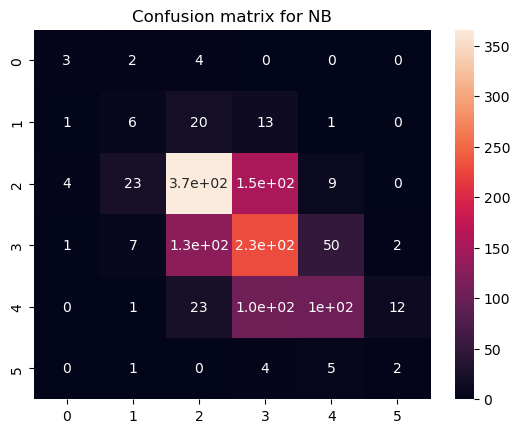

----------------------------------------
ADA BOOST CLASSIFIER---> AB
------------------------------------

1. Accuracy = 94.92572322126661

              precision    recall  f1-score   support

           3       0.33      0.33      0.33         9
           4       0.15      0.15      0.15        40
           5       0.66      0.68      0.67       541
           6       0.55      0.45      0.50       504
           7       0.42      0.62      0.50       169
           8       0.17      0.12      0.14        16

    accuracy                           0.56      1279
   macro avg       0.38      0.39      0.38      1279
weighted avg       0.56      0.56      0.55      1279

----------------------------------------
PREDICTION 
------------------------------------

-------------------------
[0] Quality is BAD
-------------------------
-------------------------
[1] Quality is BAD
-------------------------
-------------------------
[2] Quality is GOOD
-------------------------
------------

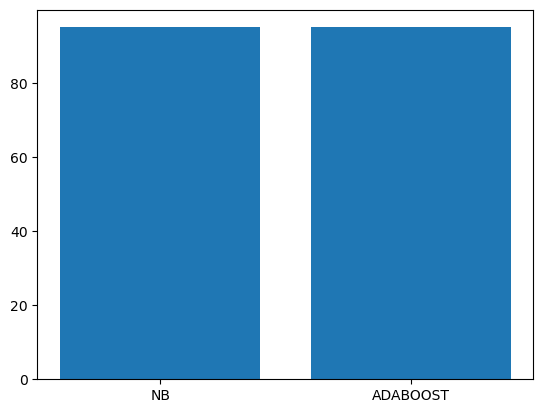

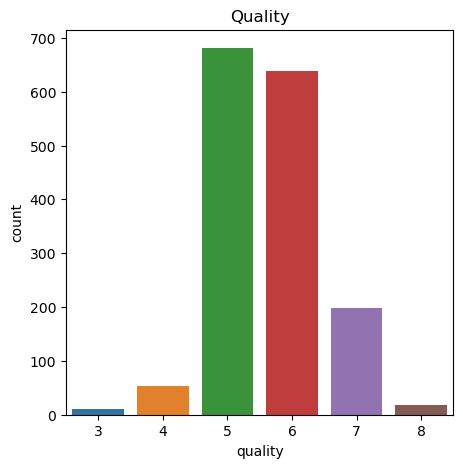

In [1]:
#======================= IMPORT PACKAGES =============================

import pandas as pd
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from sklearn import preprocessing

#===================== DATA SELECTION ==============================

#=== READ A DATASET ====

data_frame=pd.read_csv("winequality-red.csv")
print("----------------------------------")
print("       1.Data Selection           ")
print("----------------------------------")
print()
print(data_frame.head(20))


#===================== DATA PREPROCESSING ==============================

#=== CHECK MISSING VALUES ===

print("=====================================================")
print("                    2.Preprocessing                  ")
print("=====================================================")
print()
print("--------------------------------------------")
print("          Checking missing values           ")
print("--------------------------------------------")
print()
print(data_frame.isnull().sum())
print()

#============================= DATA SPILLTING =========================


X = data_frame.drop("quality",axis=1)
Y = data_frame["quality"]

print("----------------------------------------")
print("DATA SPLITTING")
print("------------------------------------")
print()
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=1)


print()
print("Total Number Of data      = ", len(X))
print()
print("Total Number Of Test data = ", len(x_test))
print()
print("Total Number Of Train data = ", len(x_train))
print()

#============================= CLASSIFICATION =========================

# ==== NAIVE BAYES ===

from sklearn.naive_bayes import GaussianNB

model = GaussianNB()

# Model training
model.fit(x_train, y_train)

Y_pred = model.predict(x_train)

from sklearn import metrics

Accuracy_rf=metrics.accuracy_score(y_train,Y_pred)*100

error_nb=metrics.mean_absolute_error(y_train,Y_pred)*10

Accuracy_nb=100-error_nb
 
print("----------------------------------------")
print("NAIVE BAYES ---> NB")
print("------------------------------------")
print()
print("1. Accuracy =",Accuracy_nb )
print()
print(metrics.classification_report(y_train,Y_pred))


# === CONFUSION MATRIX ===
cm_nb=metrics.confusion_matrix(Y_pred,y_train)

import seaborn as sns
sns.heatmap(cm_nb, annot=True)
plt.title("Confusion matrix for NB")
plt.show()



# ==== ADABOOST ===

from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier()

# Model training
ada.fit(x_train, y_train)

Y_pred_ada = ada.predict(x_train)

Y_pred_ada1 = ada.predict(x_test)


from sklearn import metrics

Accuracy_ada=metrics.accuracy_score(y_train,Y_pred_ada)*100

error_ada=metrics.mean_absolute_error(y_train,Y_pred_ada)*10

Accuracy_ada=100-error_ada 
 
print("----------------------------------------")
print("ADA BOOST CLASSIFIER---> AB")
print("------------------------------------")
print()

print("1. Accuracy =",Accuracy_ada )
print()
print(metrics.classification_report(y_train,Y_pred))


# ============== PREDICTION =====================

print("----------------------------------------")
print("PREDICTION ")
print("------------------------------------")
print()

for i in range(0,5):
    if Y_pred[i]>=7:
        print("-------------------------")
        print([i],"Quality is GOOD")
        print("-------------------------")
    else:
        print("-------------------------")
        print([i],"Quality is BAD")
        print("-------------------------")        

# ==================== COMPARISON GRAPH =====================


vals=[Accuracy_nb,Accuracy_ada]
inds=range(len(vals))
labels=["NB","ADABOOST"]
fig,ax = plt.subplots()
rects = ax.bar(inds, vals)
ax.set_xticks([ind for ind in inds])
ax.set_xticklabels(labels)
plt.savefig("Performance")
plt.show()


# ================== EDA ======================

import seaborn as sns
plt.figure(figsize=(5, 5))
plt.title("Quality")
sns.countplot(x='quality',data=data_frame)
plt.show()
